***
# ***Geoanomaly Detection - GEOL5013A***
***

### **Table of Contents**
- [Imports](#7)
  * [Library Installations](#8)
  * [Library Imports](#8)
  * [Dataset](#9)
- [Exploretory Data Analysis](#10)
  * [Data Overview](#11)
  * [Visualizations](#12)
- [Data Pre-processing](#19)
  * [Normalizing Data](#20)
- [Modelling](#25)
  * [Model Evaluation](#26)
  * [Model 1](#35)
  * [Model 2](#35)
  * [Model 3](#35)
  * [Model 4](#35)
  * [Principal Component Analysis](#26)

***
# ***Imports***
***

## ***Library Installations***

In [ ]:
%pip install tensorflow

## ***Library Imports***

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## ***Dataset***

In [ ]:
df = pd.read_csv("/content/Processed_Assen_RS_data.csv")

***
# ***Exploratory Data Analysis***
***

## ***Data Overview***

In [ ]:
df.info()   # basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48848 entries, 0 to 48847
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  48848 non-null  int64  
 1   Longitude   48848 non-null  float64
 2   Latitude    48848 non-null  float64
 3   Band1       48848 non-null  int64  
 4   Band2       48848 non-null  int64  
 5   Band3       48848 non-null  int64  
 6   Band4       48848 non-null  int64  
 7   Band5       48848 non-null  int64  
 8   Band6       48848 non-null  int64  
 9   Band7       48848 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 3.7 MB


In [ ]:
df.head() # first five rows of our data

Unnamed: 0  Longitude   Latitude  Band1  Band2  Band3  Band4  Band5  Band6  \
0           0  27.564250 -25.105965    188    227    363    406    750    709   
1           1  27.564548 -25.105963    126    144    215    166    917    479   
2           2  27.564845 -25.105962    141    187    421    310   2263    947   
3           3  27.565143 -25.105961    111    170    402    291   2558   1154   
4           4  27.565440 -25.105960    232    365    658    779   2409   2199   

   Band7  
0    440  
1    232  
2    438  
3    562  
4   1319

In [ ]:
df.tail()   # last five rows of our data

Unnamed: 0  Longitude   Latitude  Band1  Band2  Band3  Band4  Band5  \
48843       48843  27.647507 -25.151951    381    449    677    884   1931   
48844       48844  27.647804 -25.151950    408    483    720    996   1840   
48845       48845  27.648102 -25.151949    364    414    584    796   1464   
48846       48846  27.648399 -25.151947    387    415    565    745   1389   
48847       48847  27.648697 -25.151946    416    435    578    719   1445   

       Band6  Band7  
48843   2451   1749  
48844   2544   2068  
48845   2274   2039  
48846   2199   1867  
48847   2133   1718

In [ ]:
# checking for missing values
missing_values  = df.isna().sum()
print(f'The number of missing values in each column is: \n {missing_values}.')


The number of missing values in each column is: 
 Unnamed: 0    0
Longitude     0
Latitude      0
Band1         0
Band2         0
Band3         0
Band4         0
Band5         0
Band6         0
Band7         0
dtype: int64.


In [ ]:
# checking for duplicates
print(f'The number of duplicated rows in this dataframe is: \n {df.duplicated().sum()}')

The number of duplicated rows in this dataframe is: 
 0


In [ ]:
# We'll need some lists of similar types of metadata to make referencing the data easier
coord_names = ['Longitude', 'Latitude']
bands = ['Band1', 'Band2','Band3', 'Band4', 'Band5', 'Band6', 'Band7']


df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce') # convert latitude to numeric values
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce') # convert longitude to numeric values



for band in bands:
    df[band] = np.abs(pd.to_numeric(df[band], errors='coerce')) # make all chemical composition to be numeric


df.describe().transpose() # print cleaned combined df

count          mean           std         min           25%  \
Unnamed: 0  48848.0  24423.500000  14101.347312    0.000000  12211.750000   
Longitude   48848.0     27.606466      0.024398   27.564250     27.585356   
Latitude    48848.0    -25.128960      0.013452  -25.152291    -25.140607   
Band1       48848.0    251.722547     94.493587    0.000000    186.000000   
Band2       48848.0    316.526327    106.311331   62.000000    248.000000   
Band3       48848.0    509.547433    145.656643  149.000000    436.000000   
Band4       48848.0    609.615419    238.682890  121.000000    467.000000   
Band5       48848.0   1648.147539    446.999961  150.000000   1382.000000   
Band6       48848.0   1801.414490    469.584012  141.000000   1539.000000   
Band7       48848.0   1216.814609    432.462650  102.000000    937.750000   

                     50%           75%           max  
Unnamed: 0  24423.500000  36635.250000  48847.000000  
Longitude      27.606466     27.627580     27.648697  
Latitude      -25.128958    -25.117309    -25.105620  
Band1         245.000000    312.000000    968.000000  
Band2         312.000000    377.000000   1171.000000  
Band3         498.000000    562.000000   1834.000000  
Band4         577.000000    706.000000   2558.000000  
Band5        1585.000000   1865.000000   5025.000000  
Band6        1830.000000   2070.000000   4031.000000  
Band7        1196.000000   1454.000000   3158.000000

## ***Visualizations***

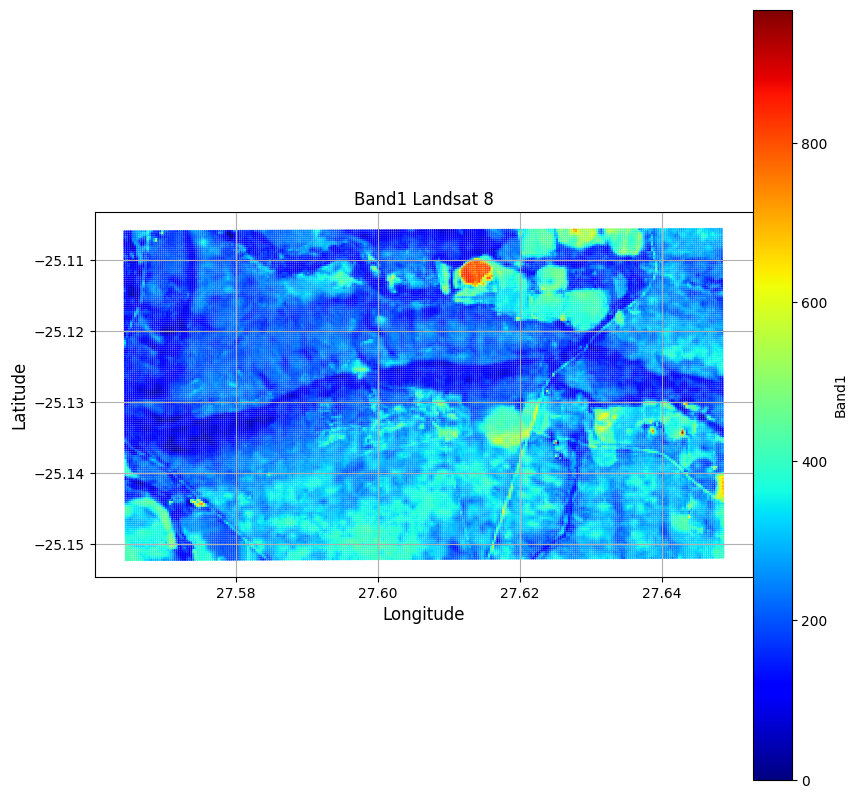

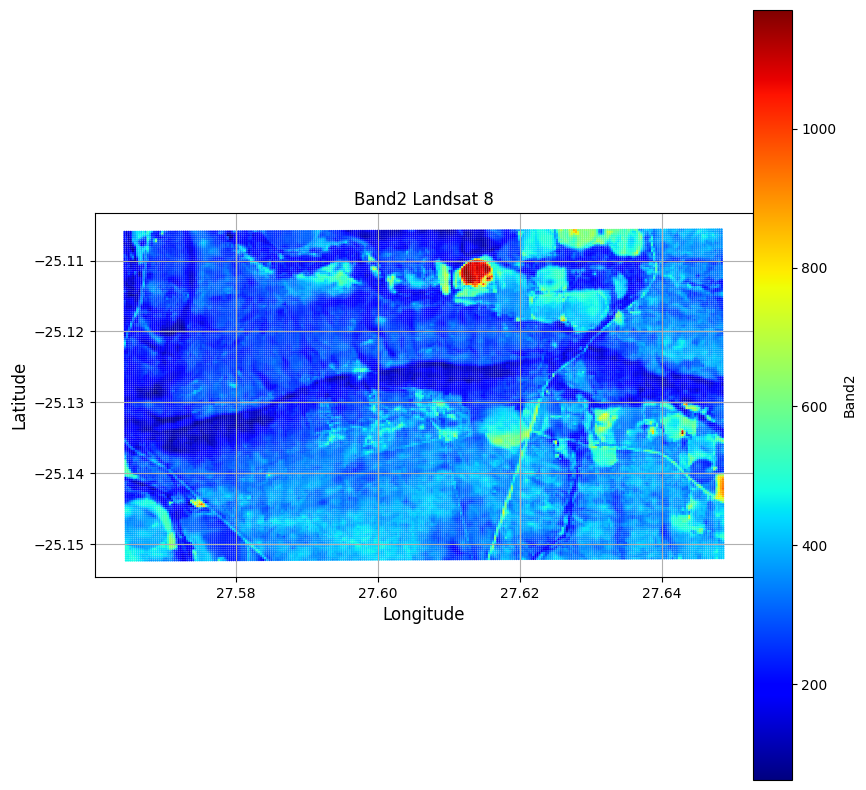

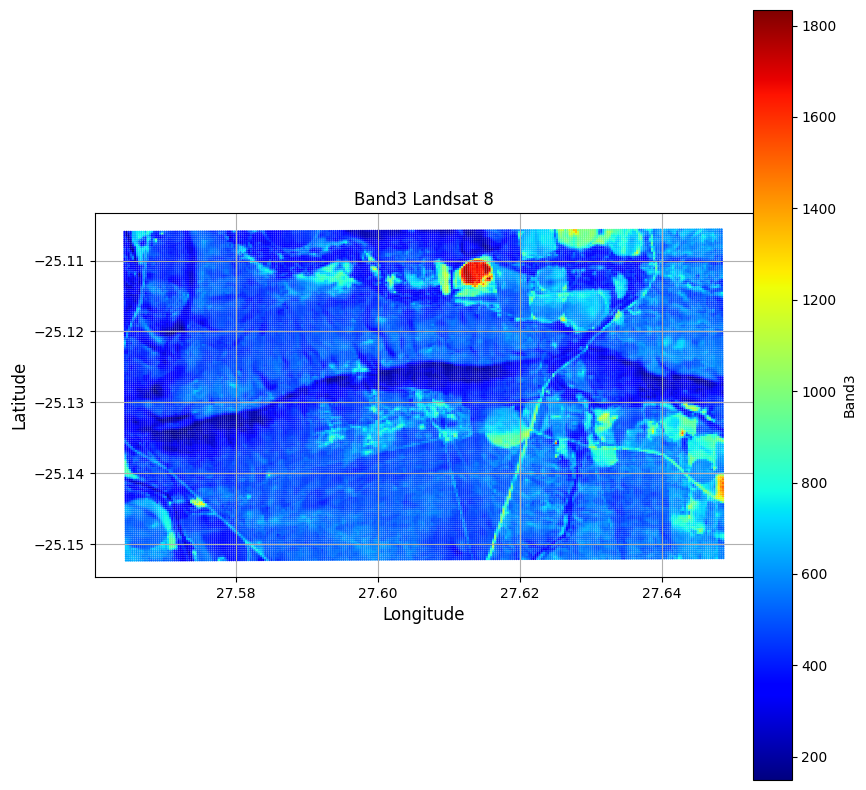

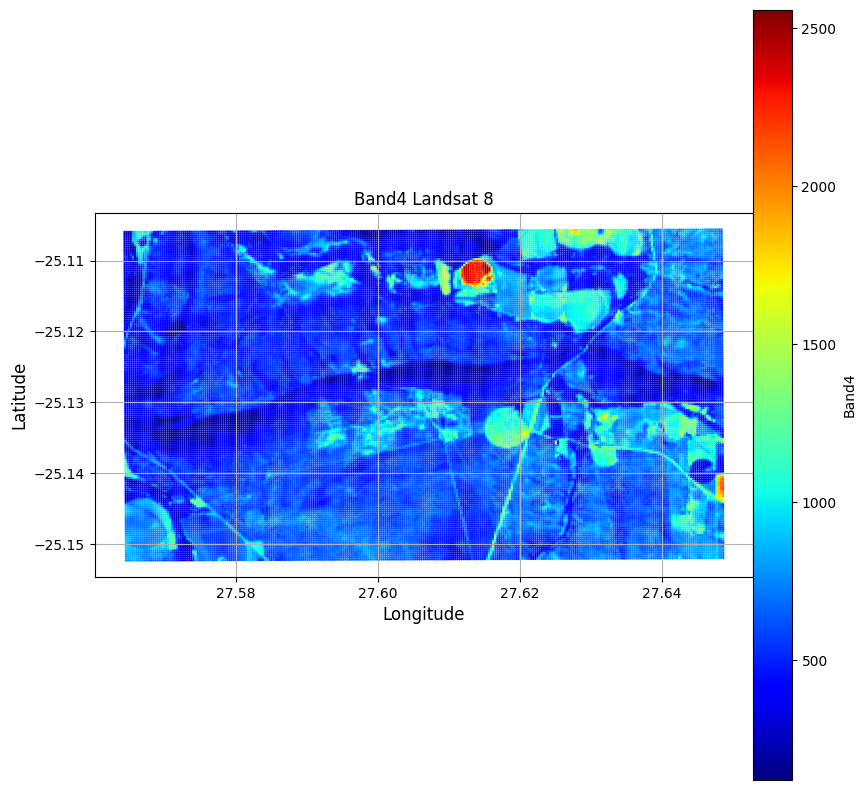

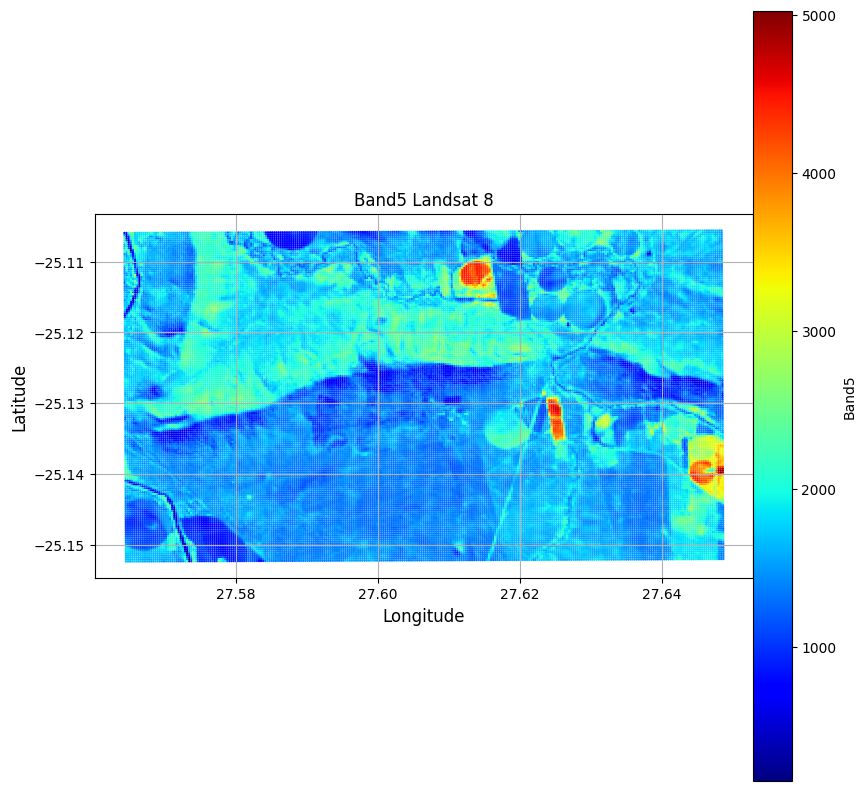

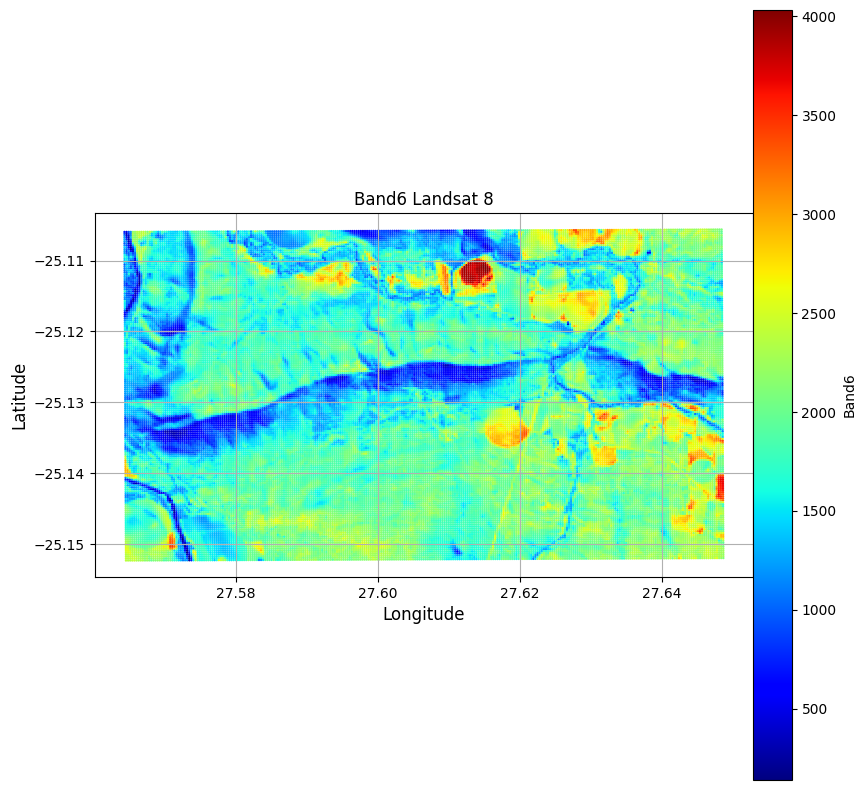

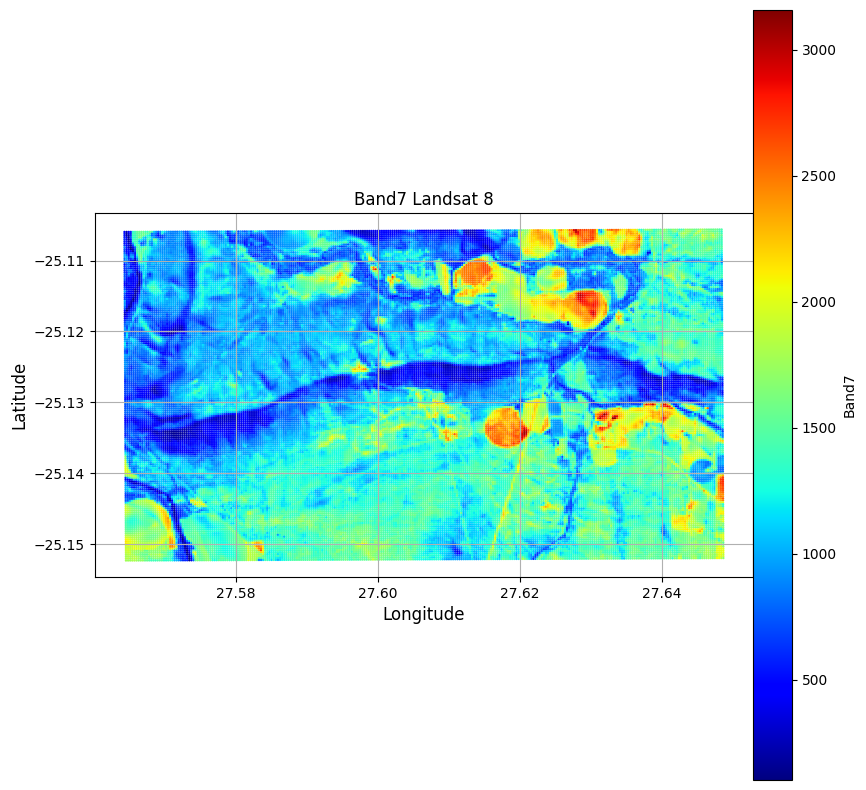

In [ ]:
coord_names = ['Longitude', 'Latitude'] # axes labels
bands = ['Band1', 'Band2','Band3', 'Band4', 'Band5', 'Band6', 'Band7'] # bands to plot

# plotting the bands
for Band in bands:

        fig = plt.figure(figsize = (10,10))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlabel('Longitude', fontsize = 12)
        ax.set_ylabel('Latitude', fontsize = 12)
        ax.set_title(Band+' Landsat 8', fontsize = 12)
        colormap=plt.cm.get_cmap('jet',int((max(df[Band])-min(df[Band]))*20))
        scatter=ax.scatter(df.Longitude, df.Latitude, c = df[Band],
                           cmap = colormap, s=3,alpha=1.0, edgecolors='none', label='Landsat 8')
        cbar=fig.colorbar(scatter, pad=-0.000)
        cbar.set_label(Band)
        ax.grid(True)
        plt.show()


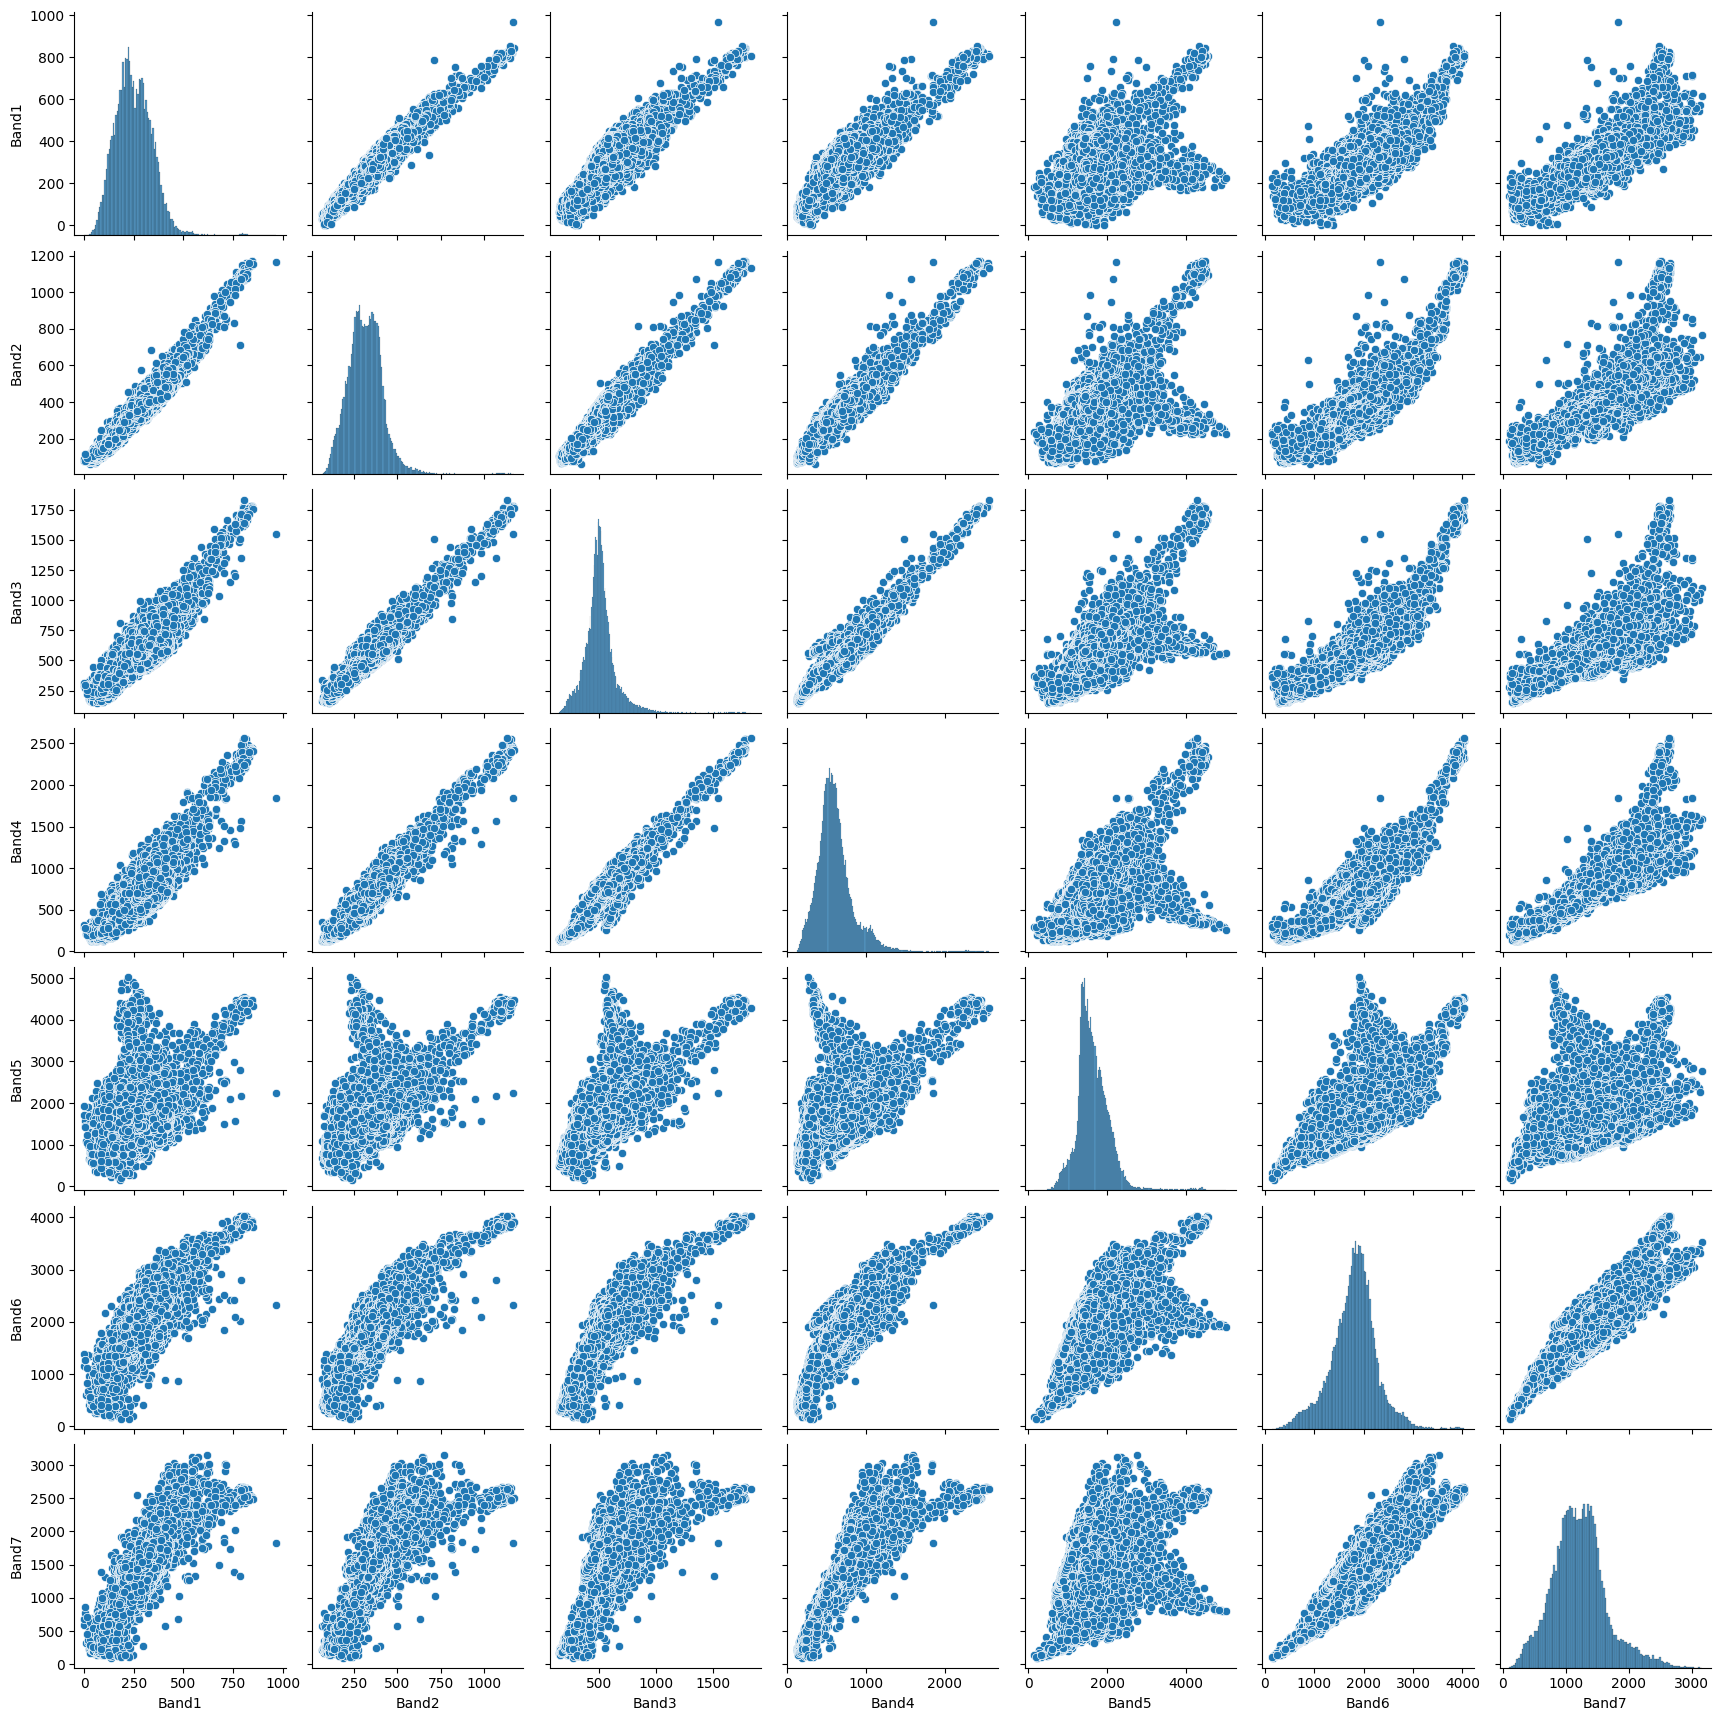

In [ ]:
sns.pairplot(df[bands])  # analyzing the feature to feature relationship
plt.show()


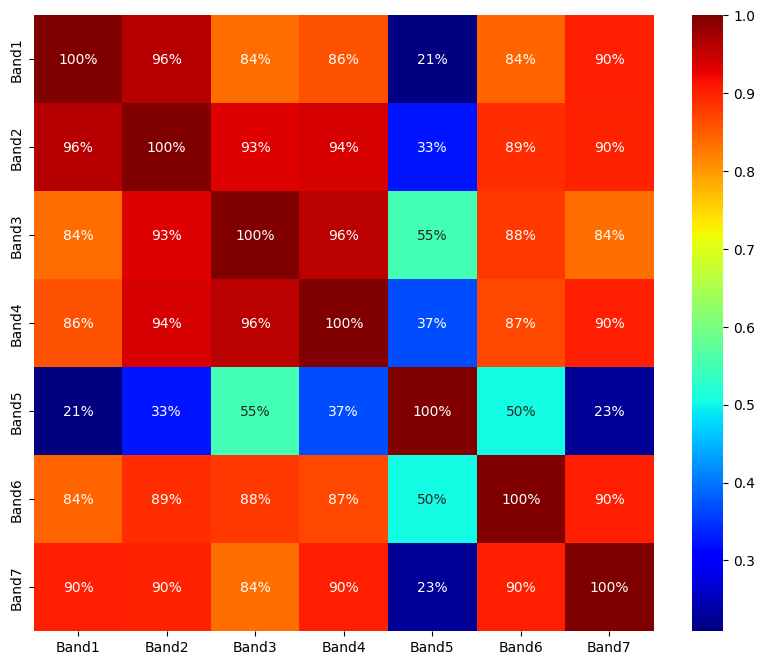

In [ ]:
plt.figure(figsize=(10, 8))     # size of the figure
sns.heatmap(data=df[bands].corr(), annot=True, fmt='.0%', cbar=True, cmap='jet')   # heatmap to plot the correlation features to each other
plt.show()

***
# ***Data Preprocessing***
***

## ***Normalizing Data***

In [ ]:
x = df[['Band1', 'Band2', 'Band3', 'Band7']]  #  input data
y = df[['Band4', 'Band5', 'Band6']]   # target data

In [ ]:
x.head() # reviewing the input data

Band1  Band2  Band3  Band7
0    188    227    363    440
1    126    144    215    232
2    141    187    421    438
3    111    170    402    562
4    232    365    658   1319

In [ ]:
y.head()  # reviewing the target data

Band4  Band5  Band6
0    406    750    709
1    166    917    479
2    310   2263    947
3    291   2558   1154
4    779   2409   2199

In [ ]:
scaler = MinMaxScaler()   # normalizing instance
x_scaled = scaler.fit_transform(x)  # input data normalized
y_scaled = scaler.fit_transform(y)  # target data normalized

x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns) # converting the scaled input data into a pandas dataframe
x_scaled_df = pd.concat([df[['Latitude', 'Longitude']], x_scaled_df], axis=1) # adding the latitude and longitude columns

In [ ]:
x_scaled_df.head()    # reviewing the scaled input data

Latitude  Longitude     Band1     Band2     Band3     Band7
0 -25.105965  27.564250  0.194215  0.148783  0.127003  0.110602
1 -25.105963  27.564548  0.130165  0.073940  0.039169  0.042539
2 -25.105962  27.564845  0.145661  0.112714  0.161424  0.109948
3 -25.105961  27.565143  0.114669  0.097385  0.150148  0.150524
4 -25.105960  27.565440  0.239669  0.273219  0.302077  0.398233

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_df, y_scaled, test_size=0.995, random_state=42)  # splitting the data into train and test data

In [ ]:
# converting the x and y test data into pandas dataframe
y_test_df = pd.DataFrame(y_test, columns=y.columns)
x_test_df = pd.DataFrame(X_test, columns=x_scaled_df.columns)

***
# ***Modelling***
***

For this task I will use four models which are:

* Random Forest Regressor
* XGBoost Regressor
* K Nearest Neighbors Regressor
* Artificial Neural Network


The reasons for why i chose these models:

**XGBoost (XGBRegressor):**
   - It has the ability to capture complex non-linear relationships making it well-suited for identifying anomalies that may manifest as intricate patterns in the data.

**Random Forest Regressor:**
   - It is an ensemble learning method which enhances robustness by aggregating predictions from multiple decision trees, making it effective in identifying anomalies that may not conform to a specific decision tree's structure.

**K Nearest Neighbors Regressor:**
   - It excels at capturing local patterns, making it well-suited for detecting anomalies that exhibit distinct local behaviors compared to the majority of data points.

**Artificial Neural Network (ANN):**
   - ANNs are adaptive in nature which allows them to learn and adjust to evolving patterns, making them suitable for detecting anomalies in dynamic datasets where the nature of anomalies may change over time.

In [ ]:
# creating a function for the machine learning workflow
def machine_learning_workflow(model, X_train_data, y_train_data, X_test_data, y_test_data, column_names):

  model.fit(X_train_data, y_train_data)   # train the model

  predictions = model.predict(X_test_data)  # predictions of the model
  predictions_df = pd.DataFrame(predictions, columns=column_names)  # storing the predictions into a pandas dataframe

  residuals = ['Residuals '+column for column in predictions_df.columns]  # creating the names for the residuals columns

  for y_true, y_pred, res in zip(y_test_data.columns, predictions_df.columns, residuals):
    predictions_df[res] = y_test_data[y_true] - predictions_df[y_pred]  # creating the residuals columns

  return predictions_df

## ***Model Evaluation***



In [ ]:
# creating a function to evaluate the models
def model_evaluation(data, predicted_bands_data, y_test_data, residuals_columns):

  y_test = pd.DataFrame(y_test_data, columns=predicted_bands_data.columns[:3])  # converting the y_test data to a dataframe

  for column in y_test.columns:
    # evaluation metrics
    r_squared = r2_score(y_test[column], predicted_bands_data[column])

    print(f'\n The evaluation of {column} is:\n')
    print(f"R-squared: {r_squared:.4f}")

  for res in residuals_columns:
    # plotting the residuals column
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.set_xlabel('Longitude', fontsize = 12)
    ax.set_ylabel('Latitude', fontsize = 12)
    ax.set_title(res+' Landsat 8', fontsize = 12)
    colormap=plt.cm.get_cmap('jet',int((max(predicted_bands_data[res])-min(predicted_bands_data[res]))*20))
    scatter=ax.scatter(data['Longitude'], data['Latitude'], c = predicted_bands_data[res],
                            cmap = colormap, s=3,marker='s', alpha=1.0, edgecolors='none', label='Landsat 8')
    cbar=fig.colorbar(scatter, pad=-0.000)
    cbar.set_label(res)
    ax.grid(True)
    plt.show()




### ***Model 1***

In [ ]:
rf_reg = RandomForestRegressor(random_state=42)   # random forest model

In [ ]:
rf_pred = machine_learning_workflow(rf_reg, X_train, y_train, X_test, y_test_df, y.columns) # predictions made by the random forest model

In [ ]:
rf_pred.head()

Band4     Band5     Band6  Residuals Band4  Residuals Band5  \
0  0.326672  0.383633  0.529093         0.027862        -0.002915   
1  0.173188  0.399701  0.438491        -0.002076         0.025325   
2  0.400981  0.409241  0.611069        -0.045215        -0.058472   
3  0.115535  0.264993  0.308702        -0.003513        -0.025403   
4  0.179163  0.379902  0.446144         0.010825        -0.027902   

   Residuals Band6  
0         0.098414  
1         0.022949  
2        -0.064026  
3        -0.010501  
4        -0.002956


 The evaluation of Band4 is:

R-squared: 0.9421

 The evaluation of Band5 is:

R-squared: 0.6115

 The evaluation of Band6 is:

R-squared: 0.8870


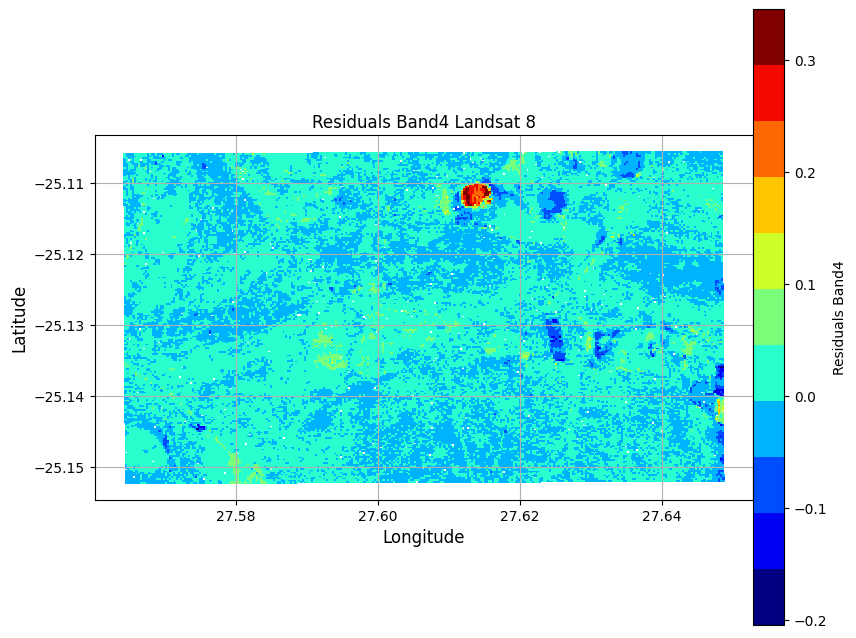

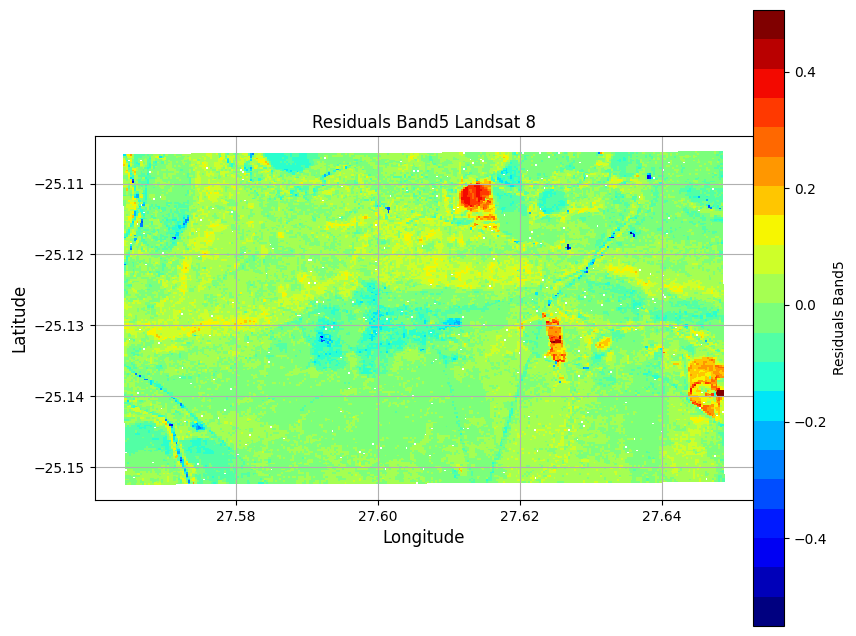

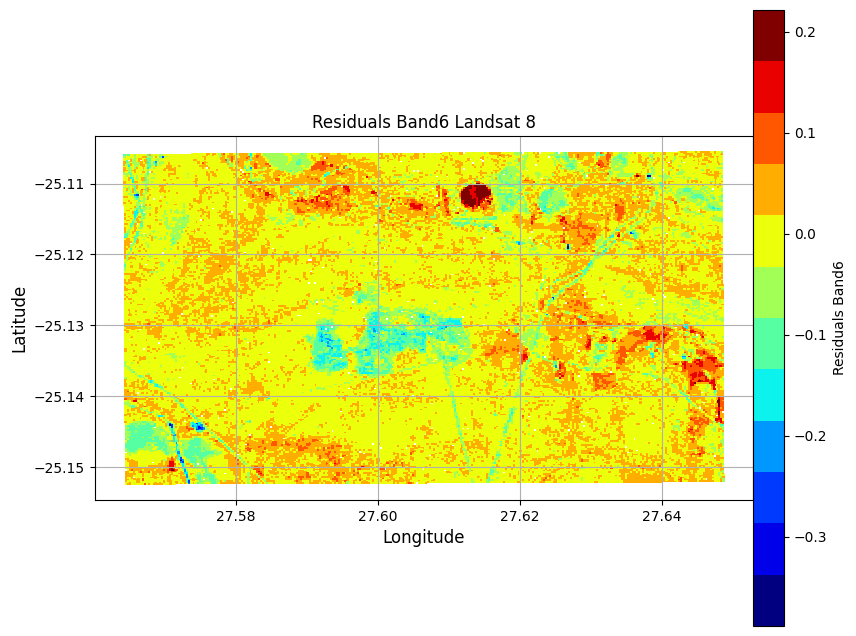

In [ ]:
model_evaluation(x_test_df, rf_pred, y_test, rf_pred.columns[3:])

Based of the first model which is the Random Forest we can see that it performed well with band 4 based of the coefficient of determination (R-squared value) with 0.9421 and the worst being band 5 with 0.6115.

### ***Model 2***

In [ ]:
xgb_reg = XGBRegressor(random_state=42) # XGBoost Regression

In [ ]:
xgb_pred = machine_learning_workflow(xgb_reg, X_train, y_train, X_test, y_test_df, y.columns) # predictions made by the xgboost regressor

In [ ]:
xgb_pred.head()

Band4     Band5     Band6  Residuals Band4  Residuals Band5  \
0  0.354795  0.402564  0.581928        -0.000261        -0.021846   
1  0.163215  0.427029  0.413854         0.007897        -0.002004   
2  0.403294  0.397446  0.611276        -0.047529        -0.046677   
3  0.109811  0.271016  0.297304         0.002212        -0.031426   
4  0.174718  0.377076  0.448930         0.015270        -0.025076   

   Residuals Band6  
0         0.045578  
1         0.047586  
2        -0.064233  
3         0.000897  
4        -0.005743


 The evaluation of Band4 is:

R-squared: 0.9181

 The evaluation of Band5 is:

R-squared: 0.5362

 The evaluation of Band6 is:

R-squared: 0.8776


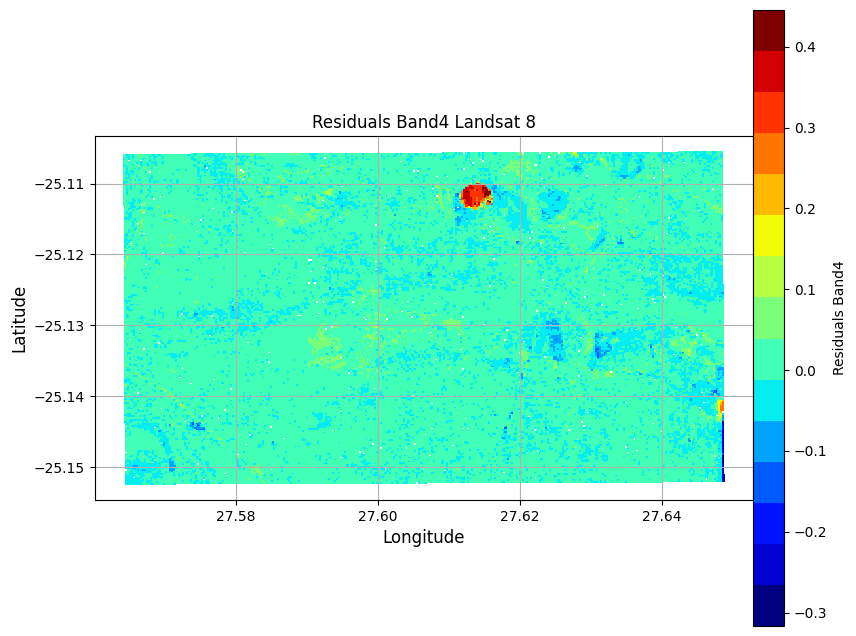

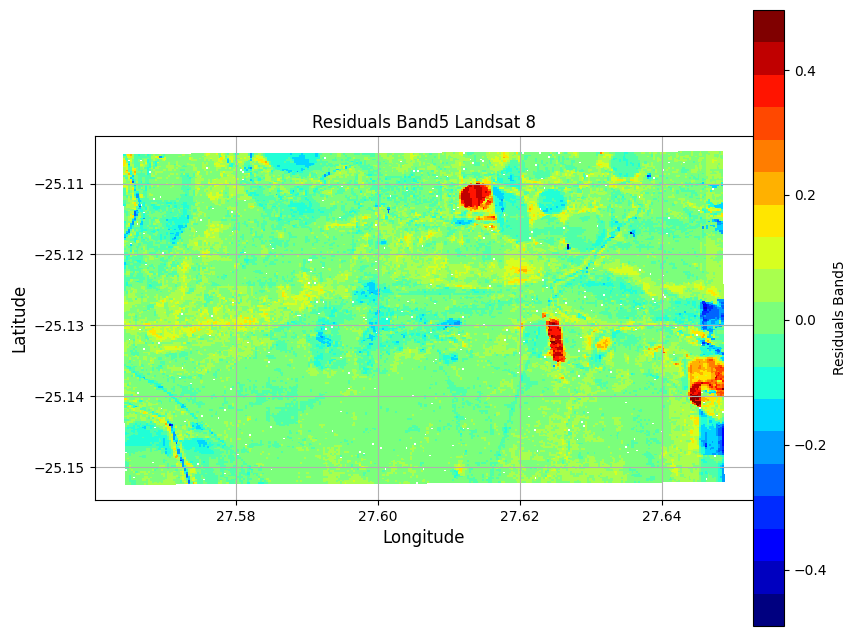

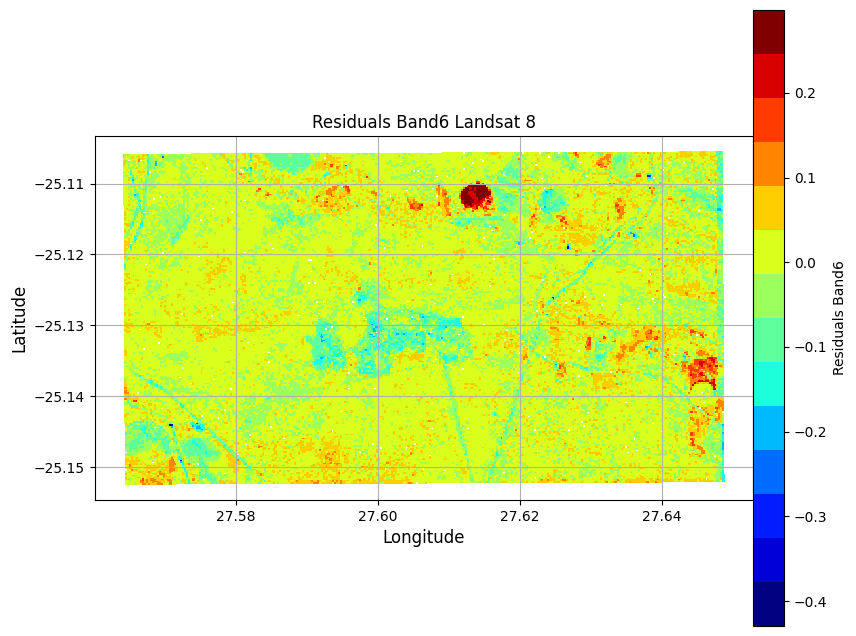

In [ ]:
model_evaluation(x_test_df, xgb_pred, y_test, xgb_pred.columns[3:])

Based of the second model which is the XGBoost Regressor we can see that it performed well with band 4 based of the coefficient of determination (R-squared value) with 0.9181 and the worst being band 5 with 0.5362.

### ***Model 3***

In [ ]:
knn = KNeighborsRegressor()   # KNN model

In [ ]:
knn_pred = machine_learning_workflow(knn, X_train, y_train, X_test, y_test_df, y.columns) # predictions made by KNN model

In [ ]:
knn_pred.head()

Band4     Band5     Band6  Residuals Band4  Residuals Band5  \
0  0.343783  0.340062  0.497018         0.010751         0.040656   
1  0.168486  0.380841  0.443959         0.002626         0.044185   
2  0.390644  0.414564  0.624833        -0.034879        -0.063795   
3  0.114403  0.252144  0.306427        -0.002380        -0.012554   
4  0.175708  0.367877  0.448278         0.014280        -0.015877   

   Residuals Band6  
0         0.130488  
1         0.017481  
2        -0.077789  
3        -0.008226  
4        -0.005090


 The evaluation of Band4 is:

R-squared: 0.9257

 The evaluation of Band5 is:

R-squared: 0.5329

 The evaluation of Band6 is:

R-squared: 0.8750


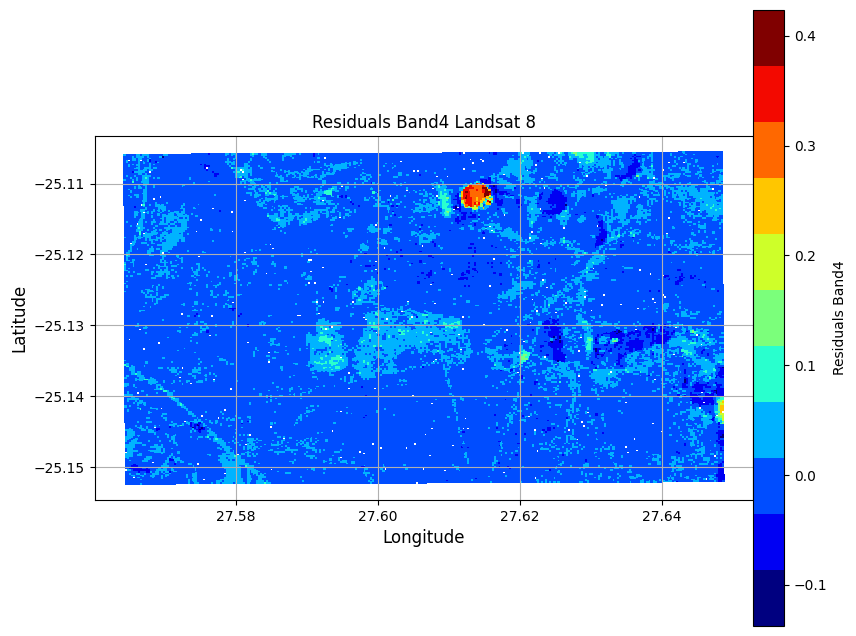

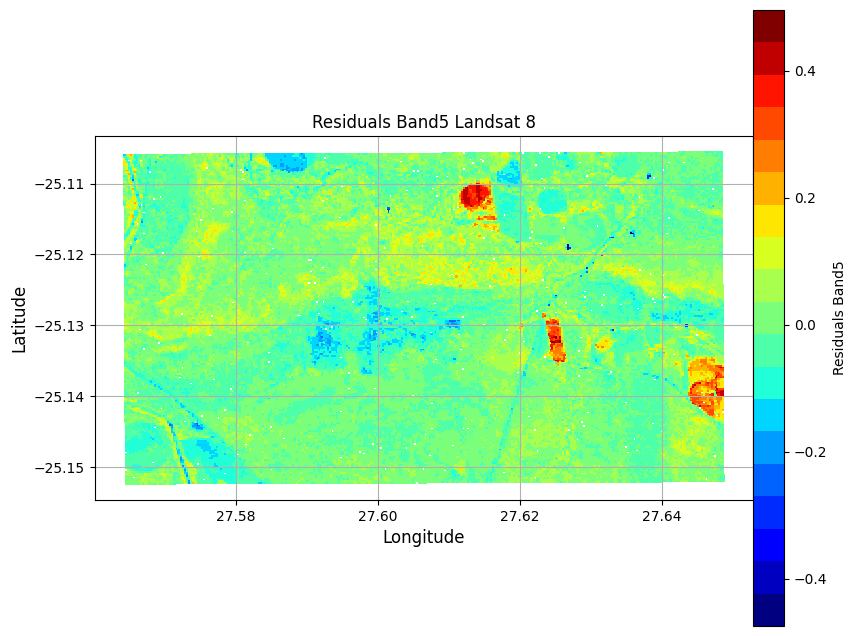

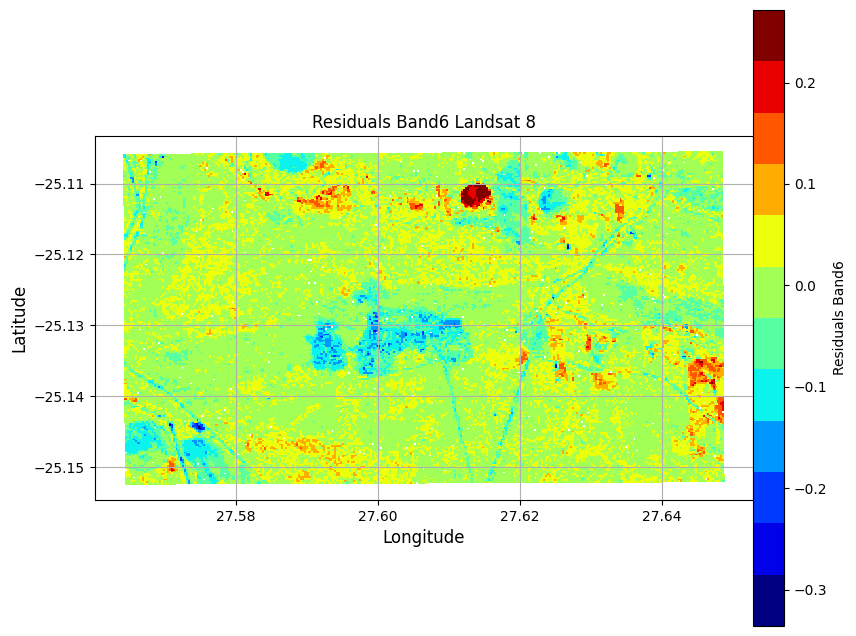

In [ ]:
model_evaluation(x_test_df, knn_pred, y_test, knn_pred.columns[3:])

Based of the third model which is the K Nearest Neighbors we can see that it performed well with band 4 based of the coefficient of determination (R-squared value) with 0.9257 and the worst being band 5 with 0.5329

### ***Model 4***

In [ ]:
nn = keras.Sequential()   # ANN model

nn.add(layers.Dense(4, input_shape=(6,)))   # input layer
nn.add(layers.Dense(8)) # hidden layer
nn.add(layers.Dense(8)) # hidden layer
nn.add(layers.Dense(3)) # output model

nn.compile(optimizer='adam', loss='mean_squared_error')   # Compiling the ANN model
nn.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))  # training the ANN model

nn_pred = nn.predict(X_test) # ANN predictions
nn_predicted_bands = pd.DataFrame(nn_pred, columns=y.columns) # predictions made by ANN

Epoch 1/15
8/8 [==============================] - 7s 777ms/step - loss: 1115.7524 - val_loss: 944.5408
Epoch 2/15
8/8 [==============================] - 3s 369ms/step - loss: 841.1784 - val_loss: 707.8165
Epoch 3/15
8/8 [==============================] - 2s 272ms/step - loss: 628.9270 - val_loss: 528.0616
Epoch 4/15
8/8 [==============================] - 2s 274ms/step - loss: 468.9097 - val_loss: 393.6254
Epoch 5/15
8/8 [==============================] - 2s 330ms/step - loss: 349.5951 - val_loss: 293.4488
Epoch 6/15
8/8 [==============================] - 5s 739ms/step - loss: 260.5412 - val_loss: 218.5829
Epoch 7/15
8/8 [==============================] - 3s 370ms/step - loss: 193.8458 - val_loss: 162.2308
Epoch 8/15
8/8 [==============================] - 2s 272ms/step - loss: 143.5214 - val_loss: 119.5866
Epoch 9/15
8/8 [==============================] - 2s 273ms/step - loss: 105.3924 - val_loss: 87.2440
Epoch 10/15
8/8 [==============================] - 2s 311ms/step - loss: 76.4968 -

In [ ]:
residuals = ['Residuals '+column for column in nn_predicted_bands.columns]  # names for the residuals columns

for y_true, y_pred, res in zip(y_test_df.columns, nn_predicted_bands.columns, residuals):
  nn_predicted_bands[res] = y_test_df[y_true] - nn_predicted_bands[y_pred]  # creating the residuals columns

In [ ]:
nn_predicted_bands.head()

Band4     Band5     Band6  Residuals Band4  Residuals Band5  \
0  3.469847 -2.723660  3.050986        -3.115313         3.104378   
1  3.577752 -2.780965  2.865694        -3.406640         3.205991   
2  3.472613 -2.757720  3.107200        -3.116848         3.108489   
3  3.657172 -2.846460  2.765057        -3.545149         3.086050   
4  3.588356 -2.808413  2.878569        -3.398368         3.160413   

   Residuals Band6  
0        -2.423479  
1        -2.404255  
2        -2.560156  
3        -2.466856  
4        -2.435381


 The evaluation of Band4 is:

R-squared: -1189.3504

 The evaluation of Band5 is:

R-squared: -1151.5040

 The evaluation of Band6 is:

R-squared: -424.0298


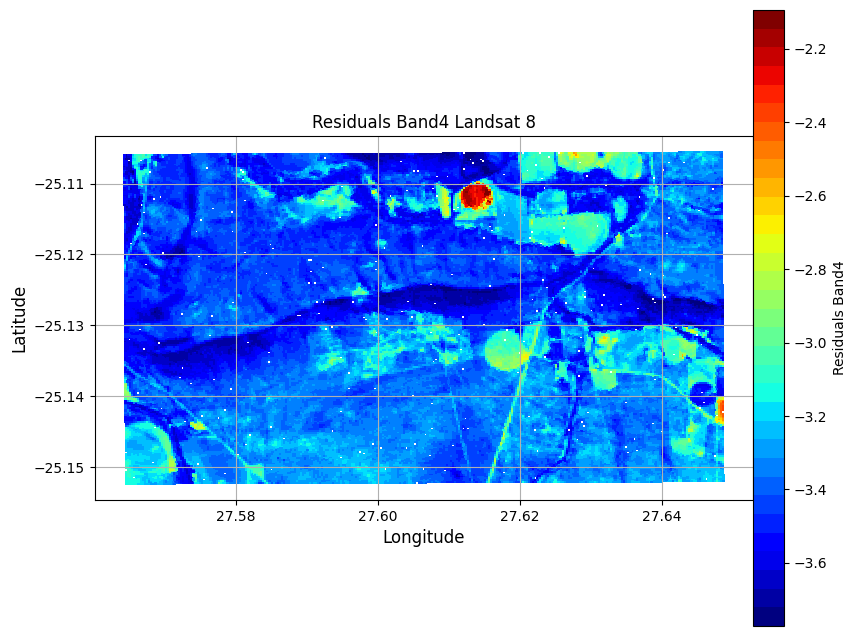

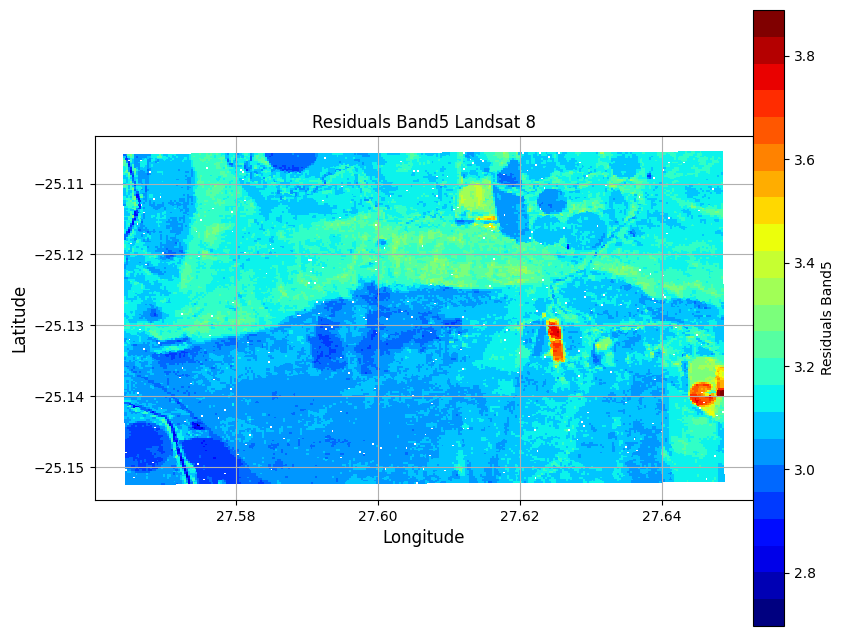

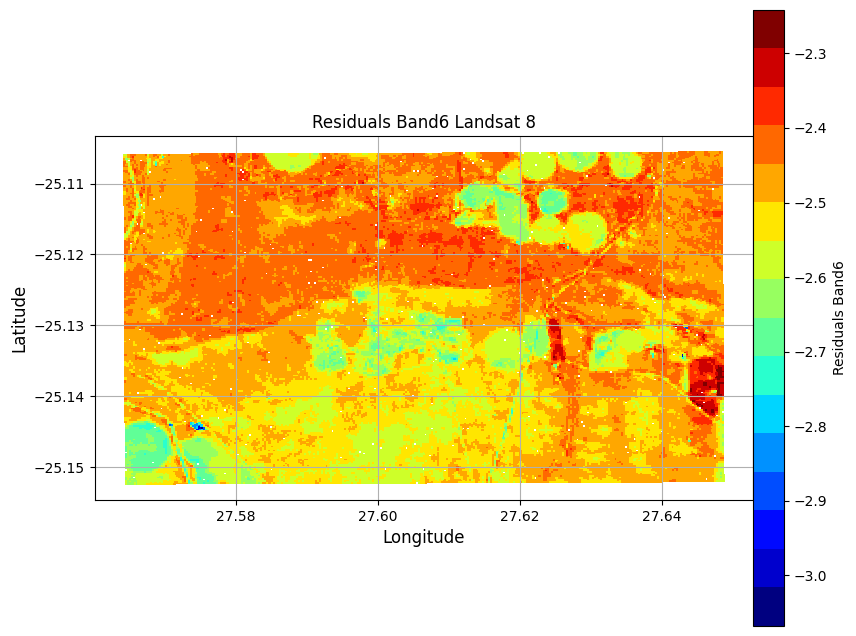

In [ ]:
model_evaluation(x_test_df, nn_predicted_bands, y_test, nn_predicted_bands.columns[3:])

Based of the fourth model which is the Artificial Neural Network we can see that it performed well with band 6 based of the coefficient of determination (R-squared value) with -424 and the worst being band 4 with -1189.

Overall Remarks for the Anomaly Detection:

From what I found the firsd model which is the Random Forest Regressor has the highest coeeficient of determination for Band 4, Band 5 and Band 6. Meaning out of the four models tested it accurately predicted the actual Bands 4, 5 and 6 using Bands 1, 2, 3 and 7 as input data.

***I will proceed with Model 1: Random Forest Regressor results into the PCA section due to its performance.***

***
# ***Principal Component Analysis***
***

In [ ]:
# dataframe for PCA
residuals_df = rf_pred.iloc[:, 3:]

# instance for normalizing
scaler = MinMaxScaler()

# scaling the residuals
residuals_scaled = scaler.fit_transform(residuals_df)
residuals_scaled = pd.DataFrame(residuals_scaled, columns=residuals_df.columns)
residuals_scaled.head()

Residuals Band4  Residuals Band5  Residuals Band6
0         0.423604         0.518394         0.797950
1         0.369223         0.545113         0.674325
2         0.290863         0.465830         0.531847
3         0.366614         0.497117         0.619529
4         0.392657         0.494753         0.631889

In [ ]:
# creating a function to evaluate the models
def dimensionality_reduction(data, x_test_data):

  pca = PCA() # The PCA instance
  principal_components = pca.fit_transform(data)  # converting our data to the principal components once
  pca_df = pd.DataFrame(principal_components, columns=data.columns)   # creating a dataframe of the principal components

  for residual in pca_df.columns:
          # plotting the pca data
          fig = plt.figure(figsize = (10,8))
          ax = fig.add_subplot(111)

          ax.set_aspect('equal')
          ax.set_xlabel('Longitude', fontsize = 12)
          ax.set_ylabel('Latitude', fontsize = 12)
          ax.set_title(residual+' Landsat 8', fontsize = 12)

          colormap=plt.cm.get_cmap('jet',int((max(pca_df[residual])-min(pca_df[residual]))*20))

          scatter=ax.scatter(x_test_data['Longitude'], x_test_data['Latitude'], c = pca_df[residual],
                            cmap = colormap, s=3, marker='s', alpha=1.0, edgecolors='none', label='Landsat 8')

          cbar=fig.colorbar(scatter, pad=-0.000)

          cbar.set_label(residual)
          ax.grid(True)
          plt.show()

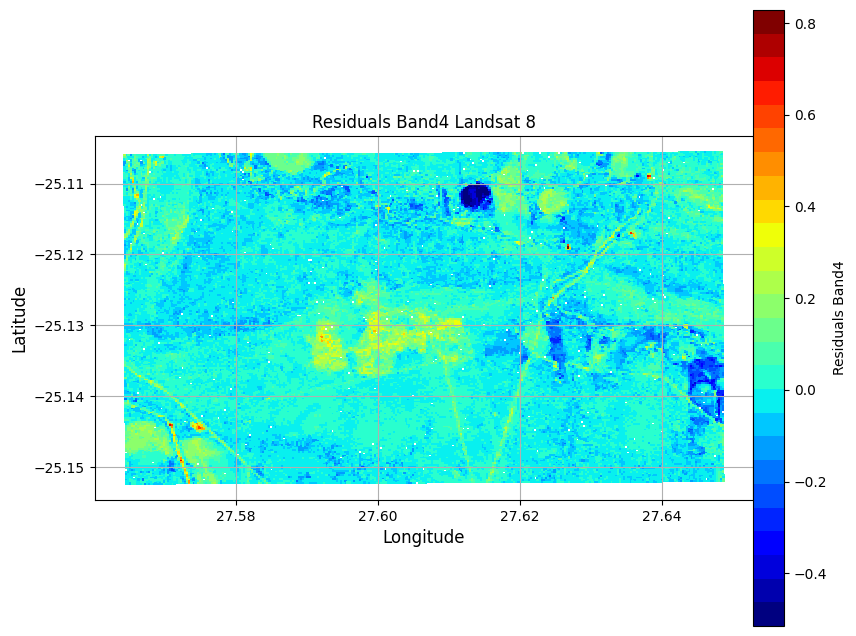

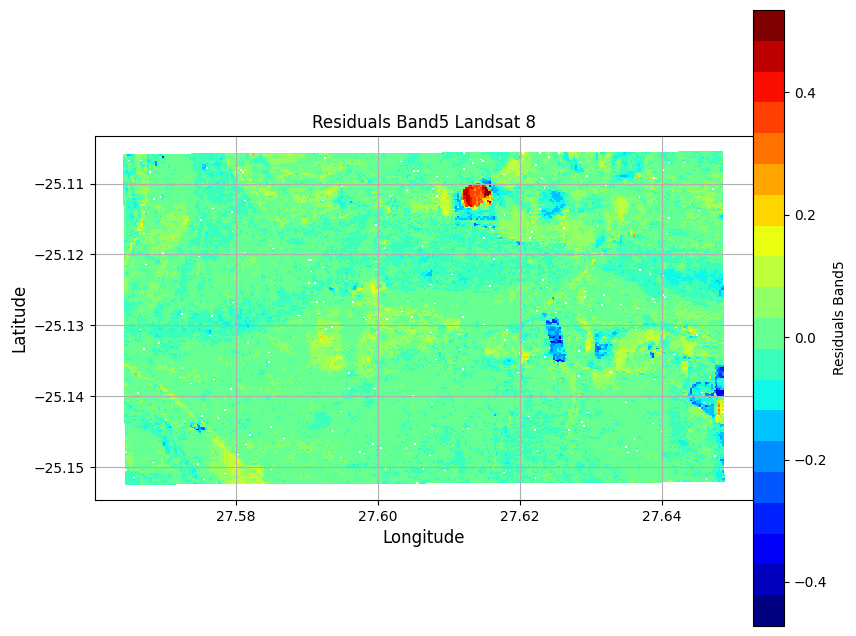

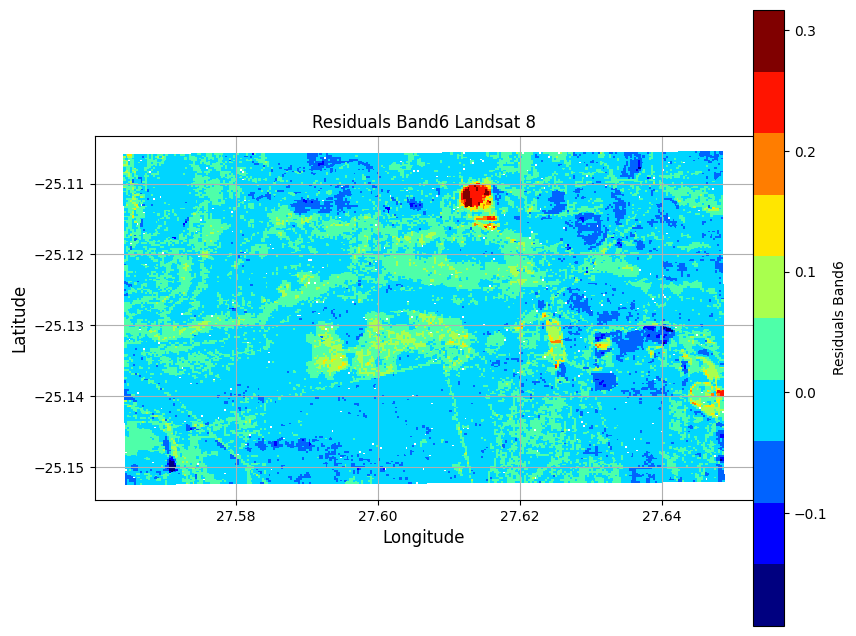

In [ ]:
dimensionality_reduction(residuals_scaled, x_test_df)